# Introduction to Data Science
## Homework 3

Student Name: Xinmeng Li

Student Netid: xl1575
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

First, we calculate
$$\sum_{x \in X} p(x) \cdot H(Y \mid X = x) = -\sum_{x \in X} p(x)\sum_{y \in Y} p(y \mid x) \cdot log(p(y \mid x)) = -\sum_{x \in X}\sum_{y \in Y}p(x,y) \cdot log(p(y \mid x)) = -\sum_{x \in Xy \in Y}p(x,y) \cdot log(\frac{p(x,y)}{p(x)})$$
We then calculate
$$\sum_{y \in Y} p(y)= \sum_{y \in Y}( \sum_{x \in X}p(x,y))$$
$\text{Information Gain} = H(Y) – H(Y \mid X)$ = $$-\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$
Here we plug in the above calculation results
$$H(Y) – H(Y \mid X) = -\sum_{y \in Y} \sum_{x \in X}p(x,y)\cdot log(p(y))+\sum_{x \in X y \in Y}p(x,y) \cdot log(\frac{p(x,y)}{p(x)}) = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [64]:
import pandas as pd
df = pd.read_csv('cell2cell_data.csv',header=None)
train_df = df.sample(frac=0.8, replace=False, random_state=1)
test_df = df[~df.index.isin(train_df.index)]
train_label = train_df[11]
test_label = test_df[11]
train_df = train_df.drop(11,axis = 1)
test_df = test_df.drop(11,axis = 1)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Approach: For each variable, compare the probability distribution of this variable in the sample data with that in X, i.e. the whole dataset. If the probability distributions for all variables are same in the sample with those in X, then the sample is unbiased. The comparation is performed through statistical tests such as chi-square test, and  Kolmogorov-Smirnov test. To make it more intuitive and straightforward for ourselves or colleagues to understand, we can plot histogram for each variable both in sample and in the whole dataset. 
Let's look at the way we generate sample. We select random sample uniformly from the data without filter, i.e. the values of feature variables have no impact on our sample selection. If being in the sample is independent of feature variables, the sample is unbiased. Therefore, our sample is random and unbiased.
For example, below we compare the distribution of outcalls in sample and in the whole dataset. We can observe that these two distributions are in a same shape.

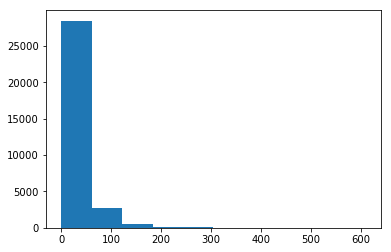

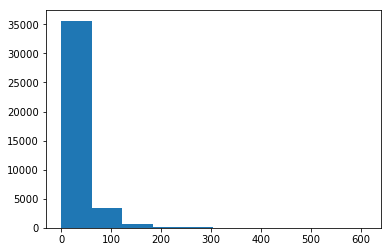

In [65]:
import matplotlib.pyplot as plt
plt.hist(train_df[1])
plt.show()
plt.hist(df[1])
plt.show()

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [86]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(train_df,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

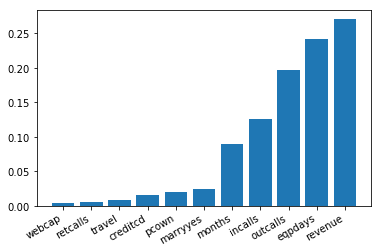

In [91]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.arange(11)
xlabel = ['revenue','outcalls','incalls' , 'months' , 'eqpdays', 'webcap'
     , 'marryyes','travel','pcown' ,'creditcd', 'retcalls']
sortlabel = [xlabel[i] for i in np.argsort(clf.feature_importances_)]
fig, ax1 = plt.subplots()
ax1.set_xticks(x)
ax1.set_xticklabels(sortlabel)
ax1.bar(x,np.sort(clf.feature_importances_))
fig.autofmt_xdate()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

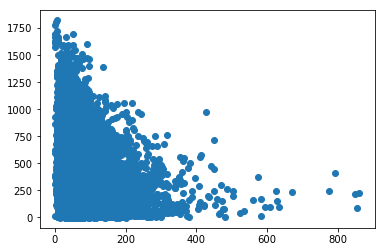

-0.223825447485


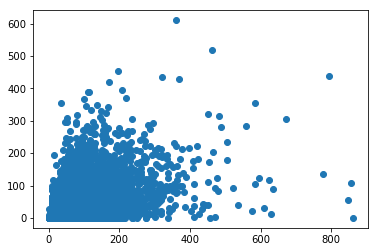

0.504087147249


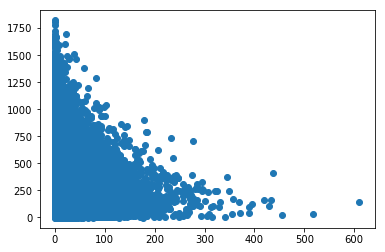

-0.246793751053


In [68]:
# The top 3 important features are revenue, eqpdays, and outcalls. 
# We use scatter plot and parson correlation
# to show the relationship between them
from scipy.stats import pearsonr
#revenue and outcalls are negatively correlated
plt.scatter(train_df[0],train_df[4])
plt.show()
print(pearsonr(train_df[0],train_df[4])[0])
#revenue and eqpdays are positively correlated
plt.scatter(train_df[0],train_df[1])
plt.show()
print(pearsonr(train_df[0],train_df[1])[0])
#eqpdays and outcalls are negatively correlated
plt.scatter(train_df[1],train_df[4])
plt.show()
print(pearsonr(train_df[1],train_df[4])[0])

In [69]:
#revenue and outcome churndep are negatively correlated
print(pearsonr(train_df[0],train_label)[0])
#outcalls and outcome churndep are negatively correlated
print(pearsonr(train_df[1],train_label)[0])
#eqpdays and outcome churndep are positively correlated
print(pearsonr(train_df[4],train_label)[0])

-0.0122723593127
-0.0354206821036
0.114306868604


Explanation: <br>The higher revenue that a customer has, the less likely he or she left the company. Customers with lower revenue may find it hard to afford the equipment for a long time or buy the equipment multiple times. Customers with higher revenue have no financial concerns, thus they are more likely get to used to the company products and then become loyal. <br>The more outbound calls, the better communication between customers and the company. A customer who recieve more calls can get to know the latest product deals and get their equipment problem fixed quickly. Therefore, the customer who gets calls more frequently will be more satisfied and is more likely to stick to this brand. <br> The longer that the customer has bought the equipment, the customer is more likely to leave. A loyal customer is not common. Normally, as time goes by, customer gets attracted other companys' products and leave.

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [70]:
print(clf.score(train_df,train_label))
print(clf.score(test_df,test_label))

0.999811835544
0.530732563974


### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [71]:
# Code here
import math
min_samples_split_values = [ int(math.exp(i)) for i in np.arange(1,11)]
min_samples_leaf_values = [ int(math.exp(i)) for i in np.arange(1,11)]
print(min_samples_split_values)

[2, 7, 20, 54, 148, 403, 1096, 2980, 8103, 22026]


2\. Explain in words your reasoning for choosing the above ranges.

I would like the values to spread away, because if I uniformly select 10,20...,100 or 100,200,...,1000, the range is relatively constrained and therefore I am not confident that there will exist a sweet spot in the constrained range. Generating number by powers of exponential allows me to not only try small valuss such as 2, but also large value such as 22026. This large range garantees that I can find a sweet spot, i.e. a global accuracy maximum, and then find the best parameter values.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
for s in min_samples_leaf_values:
    scor = []
    for l in min_samples_split_values:
        clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=l,min_samples_leaf=s)
        clf.fit(train_df,train_label)
        scor.append(clf.score(test_df,test_label))
    scores.append(scor)

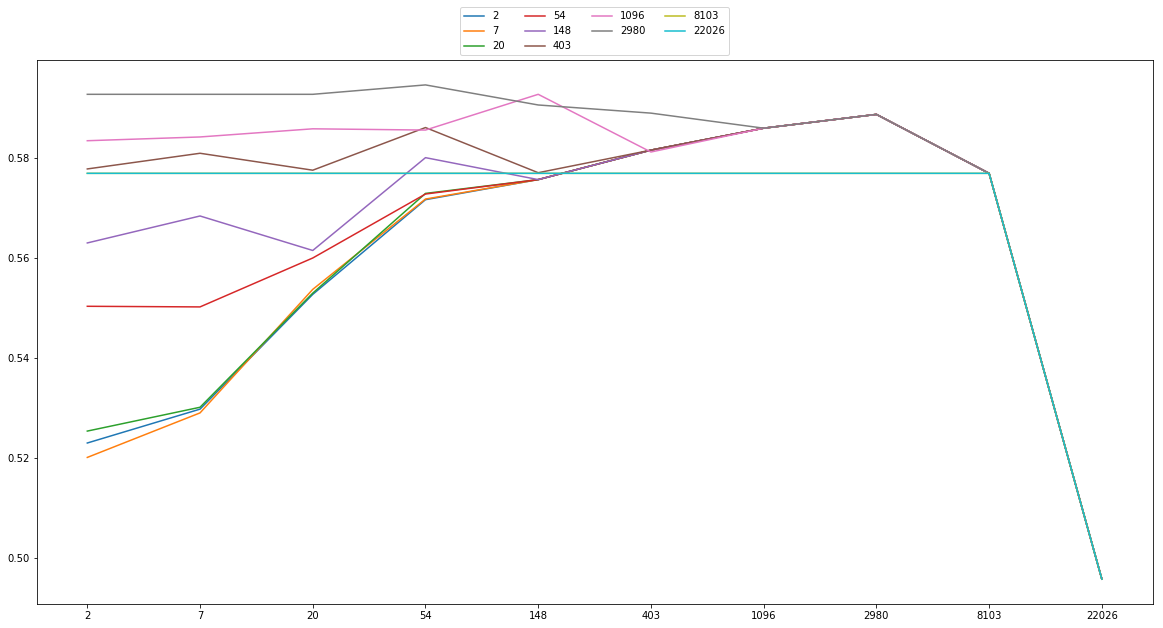

In [73]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xticks(x)
ax1.set_xticklabels(min_samples_split_values)
plt.plot(scores)
plt.legend([str(i) for i in min_samples_leaf_values],ncol=4, loc='lower center', 
           bbox_to_anchor=[0.5, 1], fancybox=True)
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [82]:
# Code here
leaf = 0
split = 0
maxacc = 0
for i in range(0,len(scores)):
    for j in range(0,len(scores[i])):
        if scores[i][j]>maxacc:
            maxacc = scores[i][j]
            leaf = min_samples_leaf_values[i]
            split = min_samples_split_values[j]
print(leaf,split,maxacc)

54 2980 0.594581033618


When min_samples_split=2980, min_samples_leaf = 54, we got the best accuracy 0.594581033618.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Making strategies for churn prevention through this model. <br>
By predicting whether customer will stay or leave via this model, we are able to target the potential loyal customers group more precisely, and thus improve churn more efficiently. The customers who become loyal will form a habit of buying equipments from this company, which increases the amount of profit and sales in a long term.<br>
To improve churn, we can make a prediction periodically and adjust our strategy to provide better service to customers who are predicted to stay, and help them to form a habit of buying in our company. For example, we can send coupons, free samples of new products or products of another category to potential loyal customer to attract them re-buy or cross-buy. We can also  give them calls such that their confusion and concern will be cleared in time. We can recommend them to register for a VIP membership, such that they will receive many rewards in the future purchases.